In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [47]:
dataset = pd.read_csv('city_happinessIndex.csv')
X = dataset.drop(['City', 'Month', 'Year'], axis=1)

In [48]:
missing = dataset.isnull().sum()
print("Missing values:\n", missing)

Missing values:
 City                    0
Month                   0
Year                    0
Decibel_Level           0
Traffic_Density         0
Green_Space_Area        0
Air_Quality_Index       0
Happiness_Score         0
Cost_of_Living_Index    0
Healthcare_Index        0
dtype: int64


In [49]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), ['Traffic_Density'])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [50]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [51]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X = pca.fit_transform(X)

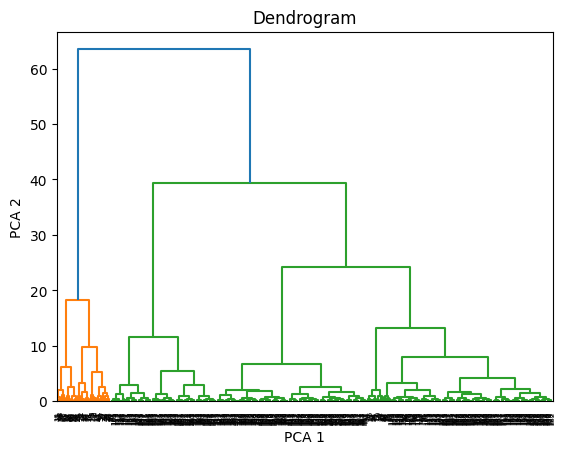

In [52]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X, method='ward'))
plt.title('Dendrogram')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

In [53]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters=2, metric='euclidean', linkage='ward')
y_hc = hc.fit_predict(X)

In [54]:
pd.set_option('display.max_columns',None)
dataset['Cluster'] = y_hc
cluster_summary = dataset.groupby('Cluster').mean(numeric_only=True)
print(cluster_summary)

                Year  Decibel_Level  Green_Space_Area  Air_Quality_Index  \
Cluster                                                                    
0        2026.335391      54.938272       1213.590535          27.685185   
1        2024.000000      71.949153         29.152542         123.305085   

         Happiness_Score  Cost_of_Living_Index  Healthcare_Index  
Cluster                                                           
0             -50.943621             26.018519         96.306584  
1               5.201695             67.033898         66.559322  


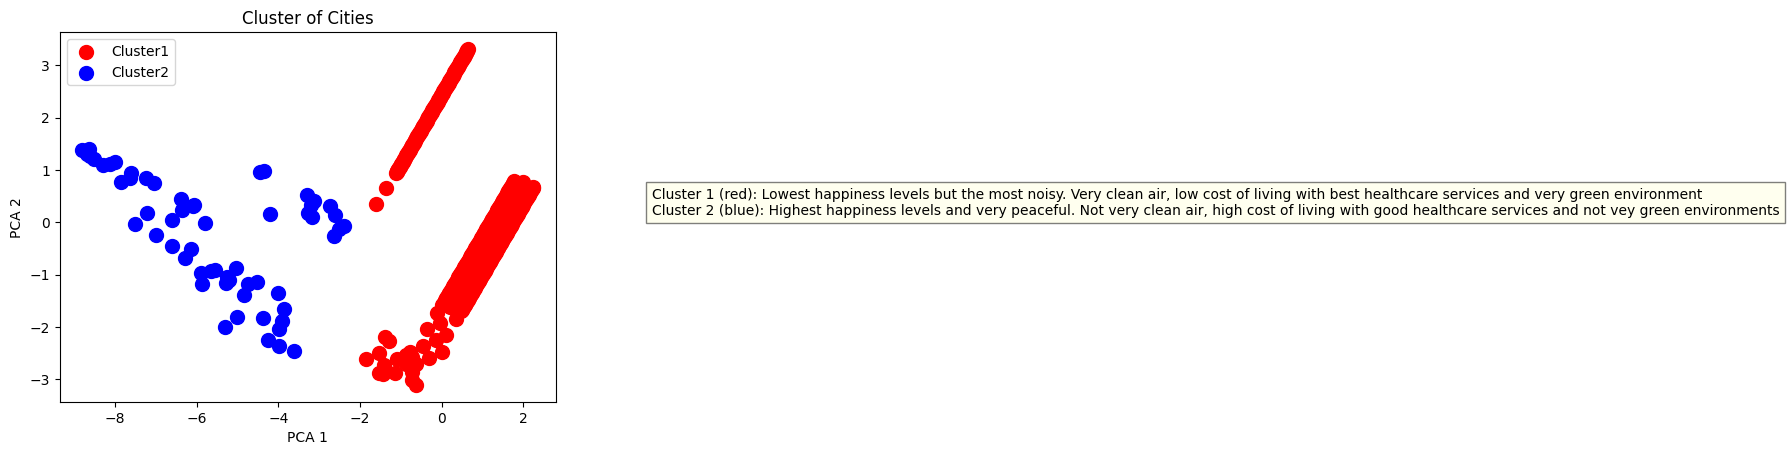

In [55]:
plt.scatter(X[y_hc==0,0], X[y_hc==0,1], s=100, c='red', label='Cluster1')
plt.scatter(X[y_hc==1,0], X[y_hc==1,1], s=100, c='blue', label='Cluster2')

plt.title('Cluster of Cities')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend()
descriptions = [
    "Cluster 1 (red): Lowest happiness levels but the most noisy. Very clean air, low cost of living with best healthcare services and very green environment",
    "Cluster 2 (blue): Highest happiness levels and very peaceful. Not very clean air, high cost of living with good healthcare services and not vey green environments"
]

textstr = "\n".join(descriptions)
plt.gcf().text(1.05, 0.5, textstr, fontsize=10, bbox=dict(facecolor='lightyellow', alpha=0.5))
plt.show()

In [56]:
from sklearn.metrics import silhouette_score

score = silhouette_score(X, y_hc)
print("Silhouette Score:", score)

Silhouette Score: 0.6693053327025096
